In [636]:
import numpy as np
import matplotlib.pyplot as plt

In [637]:
start, end, a, b, p = 0, 1, 1, np.exp(2), 3**(1/2)
C2 = (b - p * np.exp(p) - (p ** 2) * np.exp(p) + p * a * np.exp(-p)) / (p * np.exp(-p) + p * np.exp(p))
C1 = a - C2
print (C1)
print(C2)
# a = C1 + C2
# der(x) = -p*c1*np.exp(-p*x) + c2*p*np.exp(p*x) + p*np.exp(p*x) + p**2*x*np.exp(p*x)
#der(1) = -p*(a - c2)*np.exp(-p) + c2*p*np.exp(p)+ p*np.exp(p) + p**2*np.exp(p) = b
#c2 = (b -  p*np.exp(p) - p**2*np.exp(p) + p*a*np.exp(-p)) / (p*np.exp(-p) + p*np.exp(p))

2.886927876405352
-1.8869278764053516


In [638]:
# def f(x):
#     return np.exp(2 * p * x) * 2 * (p ** 2)
# def solution(x):
#     return C1 * np.exp(-p*x) + (C2 + p*x)*np.exp(p*x)
# def f(x):
#     return x ** 2 + x ** 3
def solution(x):
    return np.exp(2 * x)
def f(x):
    return np.exp(2 * x)
    

In [639]:
# def SweepMethod(start, end, a, b, p, N):
#     h = (end - start) / N
#     u = np.empty(N + 1)
    
#     alpha = np.empty(N)
#     beta = np.empty(N)
    
#     alpha[0], beta[0] = 0, a
#     for i in range(1, N):
#         alpha[i] = 1 / (2 + (p ** 2) * (h ** 2) - alpha[i - 1])
#         beta[i] = (beta[i - 1] - (h ** 2) * f(start + i * h)) / ( 2 + (p ** 2) * (h ** 2) - alpha[i - 1])
#     #u[N] = ( 1 /h * beta[N - 1] + b) / (1 / h - 1 / h * alpha[N - 1])   
#     #u[N] = (beta[N - 1] + (h ** 2)* f(1) / 2 +  b * h) / ( 1 - (p ** 2) * (h ** 2) / 2 - alpha[N - 1])
#     u[N] = ( 1 / h - b) / (h * alpha[N - 1])
#     for i in range (N-1, -1, -1):
#         u[i] = alpha[i] * u[i + 1] + beta[i]
#     return u


In [640]:
def TDMA_version( start, end, a, b, p, N):
    h = (end - start) / N
    u = np.empty(N + 1) 
    u[0] = a
    u[N] = b
    delta = np.empty(N + 1)
    beta = np.empty(N + 1)
    
    for i in range (0, N + 1):
        delta[i] = f(start + i * h)
        beta[i] = - 2  / (h ** 2) - p ** 2
        
    delta[0] += - u[0] / (h ** 2)
    delta[N] += - u[N] / ( h** 2)
    c = 1 / (h ** 2)
    a = 1 / (h ** 2)
    
    for i in range(1, N):
        m = a / beta[i - 1]
        beta[i] = beta[i] - m * c
        delta[i] = delta[i] - m * delta[i - 1]
    for i in range (N - 1, -1, -1):
        u[i] = (delta[i] - c * u[i + 1]) / beta[i]
    
    return u
    

In [641]:
# def SweepMethod(SegmentBegin, SegmentEnd, a, b, p , N):
#     u = np.empty(N + 1)
#     step = (SegmentEnd - SegmentBegin) / N
    
#     ksi = np.empty(N)
#     eta = np.empty(N)
    
#     ksi[0], eta[0] = 0, a
#     for i in range(1, N):
#         ksi[i] = 1 / (2 + (p ** 2) * (step ** 2) - ksi[i - 1])
#         eta[i] = (eta[i - 1] - (step ** 2) * f(SegmentBegin + i * step)) / (2 + (p ** 2) * (step ** 2) - ksi[i - 1])
#     u[N] = ( 1 / step - 1) / (step * ksi[N - 1])
#     #u[N] = ( 1 /step * eta[N - 1] + b) / (1 / step - 1 / step * ksi[N - 1])
#     #u[N] = ( 1 /step + b) / (1 / step - 1 / step * ksi[N - 1])
#     for i in range(N - 1, -1, -1):
#         u[i] = ksi[i] * u[i + 1] + eta[i]
#     print('a = ', ksi)
#     print('b = ', eta)
#     print('u = ', u)
#     return u

In [642]:
def visual(start, end, a, b, p):
    plt.xlabel('x')
    plt.xlabel('y')
    
    x = np.linspace(start, end, 256)
    y = solution(x)
    plt.grid()
    plt.plot(x, y, 'r')

    N = 5
    count = 10
    error = np.empty(count)

    for i in range(count):
        x_h = np.linspace(start, end, N + 1)
        err = np.empty(N + 1)
        u = TDMA_version(start, end, a, b, p, N)
        
        err = np.fabs(solution(x_h) - u)
        error[i] = np.max(err)

        plt.plot(x_h, u , 'b')
        N *= 2

    for i in range(count - 1):
        print('p =', np.log2(error[i] / error[i + 1]))
    plt.show()
    return error

p = 0.638495029165716
p = 0.8059029926553918
p = 0.9000489437628112
p = 0.9493515788421011
p = 0.9745139404063027
p = 0.9872172873629288
p = 0.9935988192032253
p = 0.996796965432013
p = 0.9983978731580084


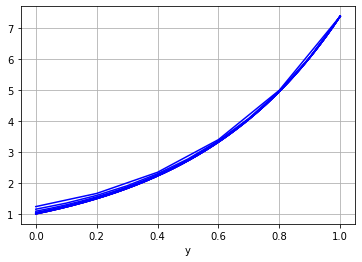

In [643]:
error_1 = visual(start, end, a, b, p)

In [ ]:
def visual(u, start, end, T, N):
    plt.xlabel('X')
    plt.ylabel('Y')
    x = np.linspace(start, end, N + 1)
    
    Table = main(start, end, 0.01, N)
    U = (Table[0])[0:N + 1, Table[1]]
    plt.plot(x, U, 'g')
    
     Table = main(start, end, 0.1, N)
    U = (Table[0])[0:N + 1, Table[1]]
    plt.plot(x, U, 'b')
    
     Table = main(start, end, 0.2, N)
    U = (Table[0])[0:N + 1, Table[1]]
    plt.plot(x, U, 'r')
    
    plt.show()